# Deep Learning

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

## Feature Engineering

In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
#Chosen predict feature is price
#Others are all Features

#Checking null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

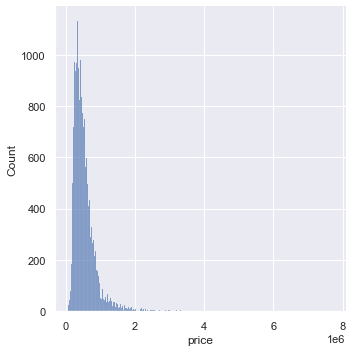

In [71]:
#Checking our pred feature 

sns.displot(df['price'])
#we have adequate data till 3M 

### Correlation

In [9]:
#finding correlations of price
df.corr()['price'].sort_values()
#Correaltion of price is graetest with sqft living

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

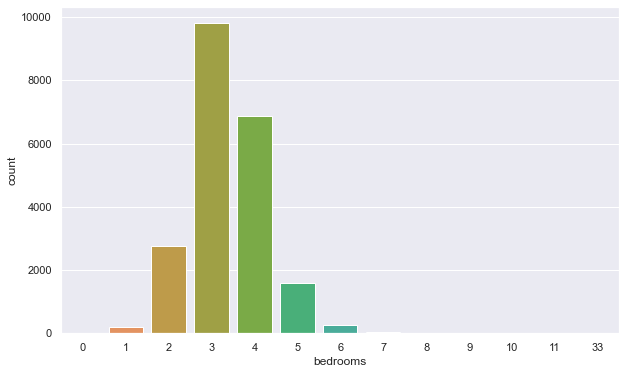

In [74]:
#Count of bedrooms in data
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

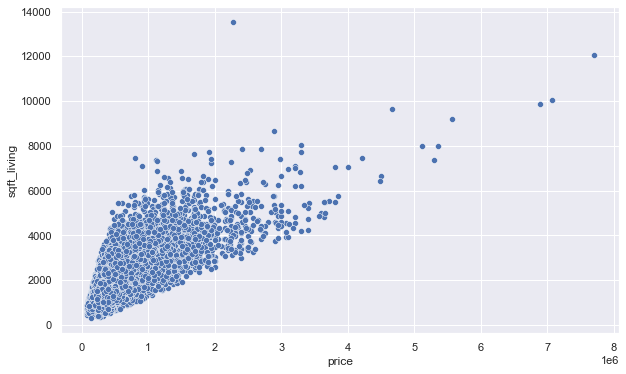

In [76]:
#Sqft_living
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='sqft_living')

#Showing correlation the more the sqft lving the more the price and most data is in 0 to 800 sqft

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

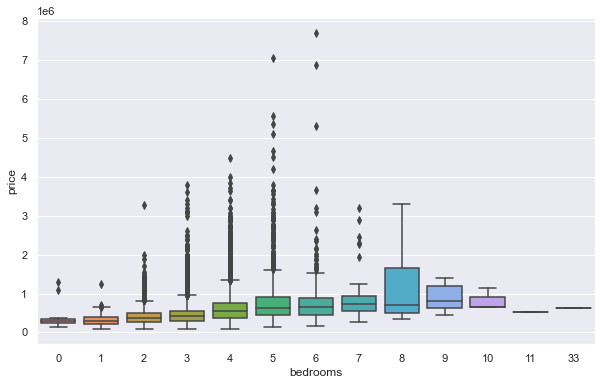

In [87]:
#Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='price', x='bedrooms')

<AxesSubplot:xlabel='price', ylabel='lat'>

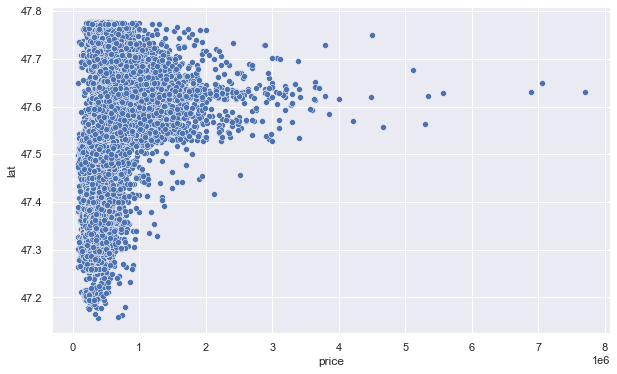

In [92]:
#Latitude
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='lat')
#shwoing we have high price areas in lat b/w 47.5 and .7

<AxesSubplot:xlabel='price', ylabel='long'>

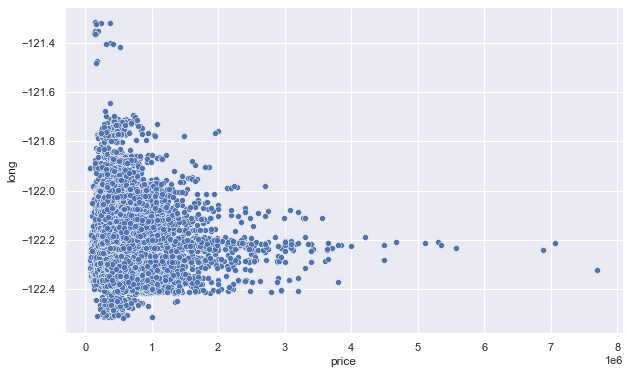

In [93]:
#Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='long')
#shwoing we have high price areas in long b/w -122.4 and -122.0

In [168]:
#Cutting off top 1 percent where our data is less for making long,lat,price plot below

len(df)
df.sort_values(by='price', ascending=False).head(20) #display top prices there are less than 25 instances

nontop1 = df.sort_values(by='price', ascending=False).iloc[216:]  #removing top 1 perc inst to remove less inst vals
nontop1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
3281,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,...,0,1951,0,47.6203,-122.212,2370,13320,2,2015,2
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,0,47.6422,-122.157,3900,35237,4,2015,4
12283,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,47.5632,-122.215,3700,14486,10,2014,10
1152,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1560,1963,0,47.7165,-122.259,2630,13868,4,2015,4
9175,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,47.5287,-122.220,3730,16560,2,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6,...,0,1954,0,47.4987,-122.341,1140,11250,11,2014,11
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5,...,0,1943,0,47.4808,-122.315,860,9000,3,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,...,0,1912,0,47.6499,-121.909,1200,7500,5,2014,5
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5,...,0,1942,0,47.4739,-122.280,1700,10387,5,2014,5


<AxesSubplot:xlabel='long', ylabel='lat'>

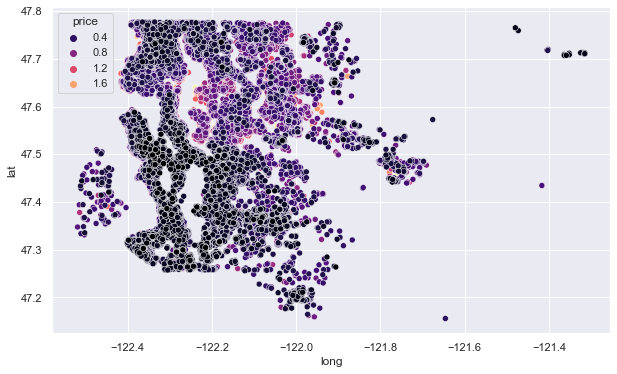

In [169]:
#Lat and long and price as hue
plt.figure(figsize=(10,6))
sns.scatterplot(data=nontop1, x='long' , y='lat'  ,hue='price', palette="magma" , )

<AxesSubplot:xlabel='waterfront', ylabel='price'>

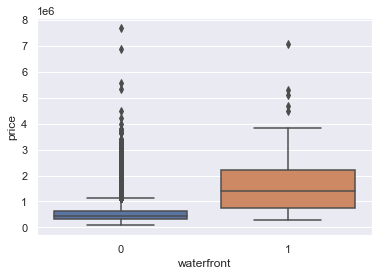

In [134]:
#Waterfront
sns.boxplot(data=df , x='waterfront', y='price')
#waterfront houses are more expensive

In [136]:
#Droppping ids as we dont need them
df = df.drop('id',axis=1) #bycol


KeyError: "['id'] not found in axis"

In [137]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Analysis on Date

In [138]:
#coverting date to datetime
df['date'] = pd.to_datetime(df['date'])

In [143]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [151]:
#Monthly and yearly
df['monthly'] = df['date'].apply(lambda x : x.month)
df['yearly'] = df['date'].apply(lambda x : x.year)

In [152]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,5,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,6,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,1,2015,1


<AxesSubplot:xlabel='monthly', ylabel='price'>

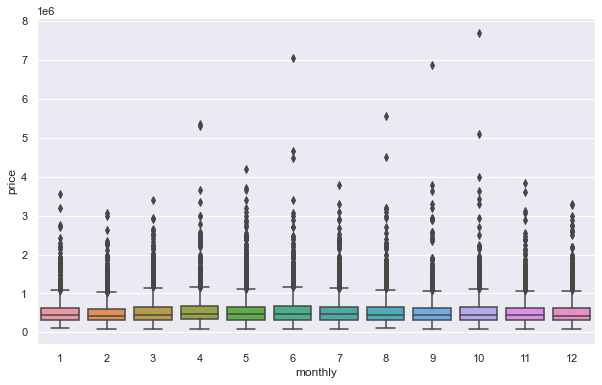

In [154]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='monthly', y='price')

<AxesSubplot:xlabel='yearly', ylabel='price'>

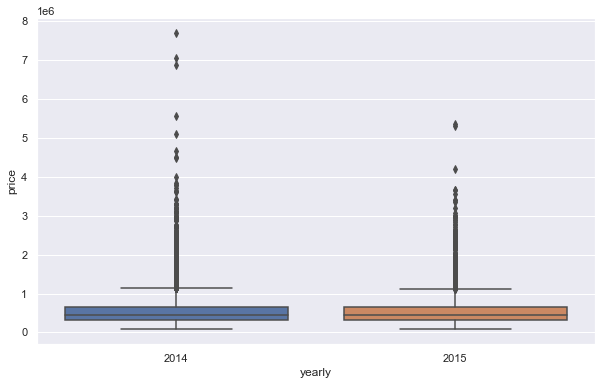

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='yearly', y='price')

<AxesSubplot:xlabel='monthly'>

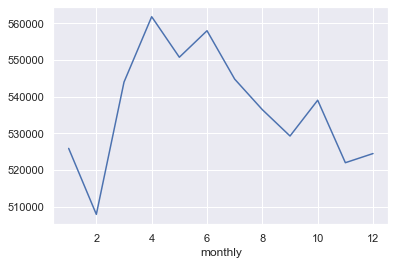

In [157]:
#Not able to comprehend from box plots bcz variation is small
#so we mean using groupby the price and then see

#montly
df.groupby('monthly').mean()['price'].plot()


<AxesSubplot:xlabel='yearly'>

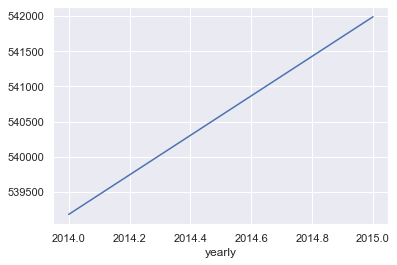

In [159]:

#Yearly
df.groupby('yearly').mean()['price'].plot()

In [161]:
#drop date time as we already have sep column for them
df = df.drop('date',axis=1)


KeyError: "['date'] not found in axis"

In [162]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,5,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,2,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,6,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,1,2015,1


### Convert to classifcation or not

In [164]:
df = df.drop('zipcode',axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,10,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,12,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,12,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,1530,1509,5,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,1830,7200,2,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,1020,2007,6,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,1410,1287,1,2015,1


In [165]:
#Wheter to conv to class values?
df['yr_renovated'].value_counts()
#keeping as regressive values not changing to classificaiton

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [166]:
df['sqft_basement'].value_counts()
#keeping as regressive values not changing to classificaiton

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## DataSplit as np arrays

In [177]:
#preddata and feature division as numpy array .values

X = df.drop('price',axis=1).values
y = df['price'].values

In [179]:
#Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Scaling and normalizing

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [190]:
#fit on train
scaler.fit(X_train)

MinMaxScaler()

In [191]:
#transforming train x-train
X_train = scaler.transform(X_train)

In [192]:
#transform x-test
X_test = scaler.transform(X_test)

## Training

In [199]:
import tensorflow
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [195]:
tensorflow.__version__

'2.5.0'

In [201]:
X_train.shape
#Using 20 for now as neurons in each layer

(14480, 20)

In [207]:
#Construct
model = Sequential()

#adding layers
model.add(Dense(20,activation = "relu")) #20 neurons each layer
model.add(Dense(20,activation = "relu"))
model.add(Dense(20,activation = "relu"))
model.add(Dense(20,activation = "relu"))

#last output layer
model.add(Dense(1,activation = "relu"))




In [208]:
#Compile Model
model.compile(optimizer="adam", loss="mse")

In [209]:
#Train and fit

model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

Epoch 1/400
114/114 [==============================] - 1s 3ms/step - loss: 425259073536.0000 - val_loss: 428757221376.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 423619854336.0000 - val_loss: 422988054528.0000
Epoch 3/400
114/114 [==============================] - 0s 1ms/step - loss: 401122131968.0000 - val_loss: 371518275584.0000
Epoch 4/400
114/114 [==============================] - 0s 1ms/step - loss: 299600609280.0000 - val_loss: 217329303552.0000
Epoch 5/400
114/114 [==============================] - 0s 1ms/step - loss: 146422120448.0000 - val_loss: 108976177152.0000
Epoch 6/400
114/114 [==============================] - 0s 1ms/step - loss: 102661382144.0000 - val_loss: 102858866688.0000
Epoch 7/400
114/114 [==============================] - 0s 1ms/step - loss: 100432945152.0000 - val_loss: 101159272448.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 98799075328.0000 - val_loss: 99437445120.0000
Epoch 9/400
114/11

Epoch 135/400
114/114 [==============================] - 0s 2ms/step - loss: 33428322304.0000 - val_loss: 31991095296.0000
Epoch 136/400
114/114 [==============================] - 0s 2ms/step - loss: 33431492608.0000 - val_loss: 31956637696.0000
Epoch 137/400
114/114 [==============================] - 0s 1ms/step - loss: 33368995840.0000 - val_loss: 31989958656.0000
Epoch 138/400
114/114 [==============================] - 0s 1ms/step - loss: 33327728640.0000 - val_loss: 31900950528.0000
Epoch 139/400
114/114 [==============================] - 0s 1ms/step - loss: 33341667328.0000 - val_loss: 31933929472.0000
Epoch 140/400
114/114 [==============================] - 0s 1ms/step - loss: 33311041536.0000 - val_loss: 31837822976.0000
Epoch 141/400
114/114 [==============================] - 0s 1ms/step - loss: 33232678912.0000 - val_loss: 31798194176.0000
Epoch 142/400
114/114 [==============================] - 0s 1ms/step - loss: 33174335488.0000 - val_loss: 31805450240.0000
Epoch 143/400
11

114/114 [==============================] - 0s 1ms/step - loss: 30573316096.0000 - val_loss: 29561602048.0000
Epoch 268/400
114/114 [==============================] - 0s 1ms/step - loss: 30551046144.0000 - val_loss: 29702742016.0000
Epoch 269/400
114/114 [==============================] - 0s 2ms/step - loss: 30557775872.0000 - val_loss: 29524070400.0000
Epoch 270/400
114/114 [==============================] - 0s 1ms/step - loss: 30553112576.0000 - val_loss: 29524756480.0000
Epoch 271/400
114/114 [==============================] - 0s 1ms/step - loss: 30518532096.0000 - val_loss: 29537837056.0000
Epoch 272/400
114/114 [==============================] - 0s 1ms/step - loss: 30525411328.0000 - val_loss: 29512814592.0000
Epoch 273/400
114/114 [==============================] - 0s 1ms/step - loss: 30475755520.0000 - val_loss: 29536825344.0000
Epoch 274/400
114/114 [==============================] - 0s 1ms/step - loss: 30470662144.0000 - val_loss: 29674209280.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 28600055808.0000 - val_loss: 28013213696.0000
Epoch 400/400
114/114 [==============================] - 0s 1ms/step - loss: 28625754112.0000 - val_loss: 27989456896.0000


### Plotting

In [215]:
lossdf = pd.DataFrame(model.history.history)
lossdf = lossdf.drop('val_loss')

,loss,val_loss
0,4.252591e+11,4.287572e+11
1,4.236199e+11,4.229881e+11
2,4.011221e+11,3.715183e+11
3,2.996006e+11,2.173293e+11
4,1.464221e+11,1.089762e+11
...,...,...
395,2.872793e+10,2.803121e+10
396,2.859731e+10,2.814813e+10
397,2.863853e+10,2.820823e+10
398,2.860006e+10,2.801321e+10


<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

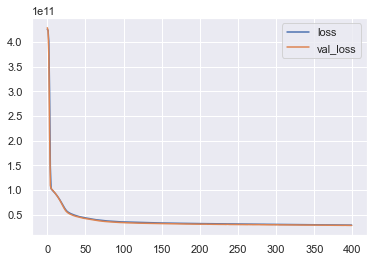

In [217]:

lossdf.plot()

In [231]:
# Calculate Errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


In [222]:
pred = model.predict(X_test)

mean_squared_error(y_test,pred)


27989457099.112095

In [223]:
mean_absolute_error(y_test,pred)

103858.08783230232

In [224]:
#Root mean squared
np.sqrt( mean_squared_error(y_test,pred))

167300.49939887237

In [227]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954,6.574423
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,12.000000


In [229]:
#our loss is 157300

5.400881e+05

540088.1

In [233]:
#Variance score
explained_variance_score(y_test,pred)
#Our model is 80% accurate

0.795917501455583

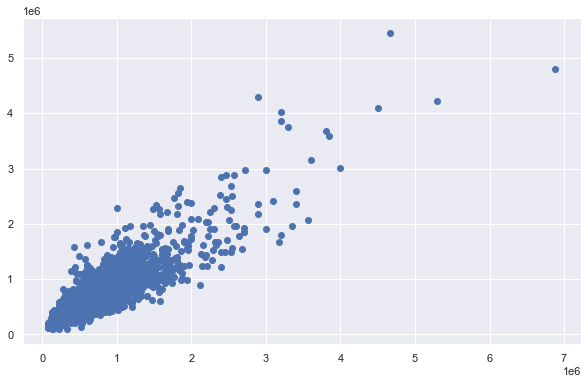

In [236]:
plt.figure(figsize=(10,6))
plt.scatter(x= y_test , y=pred)
#Accuracy is not there and is compormised by outliers So we remove the outliers

## Remove Outliers and ReTrain

In [244]:
#Wrong removing more values then required

# len(df)
# df.sort_values(by='price', ascending=False).head(20) #display top prices there are less than 25 instances

# nontop1 = df.sort_values(by='price', ascending=False).iloc[216:]  #removing top 1 perc inst to remove less inst vals
# nontop1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
3281,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,...,0,1951,0,47.6203,-122.212,2370,13320,2,2015,2
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,0,47.6422,-122.157,3900,35237,4,2015,4
12283,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,47.5632,-122.215,3700,14486,10,2014,10
1152,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1560,1963,0,47.7165,-122.259,2630,13868,4,2015,4
9175,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,47.5287,-122.220,3730,16560,2,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6,...,0,1954,0,47.4987,-122.341,1140,11250,11,2014,11
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5,...,0,1943,0,47.4808,-122.315,860,9000,3,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,...,0,1912,0,47.6499,-121.909,1200,7500,5,2014,5
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5,...,0,1942,0,47.4739,-122.280,1700,10387,5,2014,5


In [249]:
# nontop1['price'].max()

1965000.0

In [257]:
df.sort_values(by='price', ascending=False).head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,47.6298,-122.323,3940,8800,10,2014,10
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,47.6500,-122.214,3930,25449,6,2014,6
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,2001,0,47.6305,-122.240,4540,42730,9,2014,9
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,47.6289,-122.233,3560,24345,8,2014,8
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,1280,2009,0,47.6232,-122.220,4600,21750,4,2015,4
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,...,2390,1991,0,47.5631,-122.210,4320,24619,4,2015,4
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,...,2020,1999,0,47.6767,-122.211,3430,26788,10,2014,10
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,...,4820,1983,2009,47.5570,-122.210,3270,10454,6,2014,6
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,...,290,2004,0,47.7493,-122.280,3030,23408,8,2014,8
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,...,0,2001,0,47.6208,-122.219,3720,14592,6,2014,6


In [261]:
#Outlier removed after 3M
nontop1 = df.loc[df['price']<= 3000000 ]
nontop1['price'].max()

3000000.0

### Split and Scale

In [306]:
from sklearn.model_selection import train_test_split

X = nontop1.drop('price',axis=1).values
y = nontop1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [307]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit on train
scaler.fit(X_train)

#transforming train x-train
X_train = scaler.transform(X_train)


#transform x-test
X_test = scaler.transform(X_test)

In [277]:
nontop1.shape

(21568, 21)

### Training

In [278]:
#Construct
model = Sequential()

#adding layers
model.add(Dense(21,activation = "relu")) #20 neurons each layer
model.add(Dense(21,activation = "relu"))
model.add(Dense(21,activation = "relu"))
model.add(Dense(21,activation = "relu"))

#last output layer
model.add(Dense(1,activation = "relu"))

In [279]:
#Compile Model
model.compile(optimizer="Adam", loss="mse")

In [280]:
#Train and fit

model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

Epoch 1/400
113/113 [==============================] - 1s 2ms/step - loss: 394618830848.0000 - val_loss: 389342822400.0000
Epoch 2/400
113/113 [==============================] - 0s 1ms/step - loss: 392581382144.0000 - val_loss: 382230757376.0000
Epoch 3/400
113/113 [==============================] - 0s 1ms/step - loss: 363913478144.0000 - val_loss: 317201743872.0000
Epoch 4/400
113/113 [==============================] - 0s 2ms/step - loss: 240160866304.0000 - val_loss: 144539860992.0000
Epoch 5/400
113/113 [==============================] - 0s 2ms/step - loss: 100099850240.0000 - val_loss: 78070202368.0000
Epoch 6/400
113/113 [==============================] - 0s 1ms/step - loss: 79541624832.0000 - val_loss: 76232564736.0000
Epoch 7/400
113/113 [==============================] - 0s 1ms/step - loss: 77759168512.0000 - val_loss: 74499170304.0000
Epoch 8/400
113/113 [==============================] - 0s 1ms/step - loss: 75861770240.0000 - val_loss: 72636432384.0000
Epoch 9/400
113/113 [==

Epoch 135/400
113/113 [==============================] - 0s 1ms/step - loss: 28604997632.0000 - val_loss: 28761491456.0000
Epoch 136/400
113/113 [==============================] - 0s 1ms/step - loss: 28608882688.0000 - val_loss: 28692830208.0000
Epoch 137/400
113/113 [==============================] - 0s 1ms/step - loss: 28543823872.0000 - val_loss: 28632578048.0000
Epoch 138/400
113/113 [==============================] - 0s 1ms/step - loss: 28481599488.0000 - val_loss: 28633587712.0000
Epoch 139/400
113/113 [==============================] - 0s 1ms/step - loss: 28532312064.0000 - val_loss: 28596977664.0000
Epoch 140/400
113/113 [==============================] - 0s 1ms/step - loss: 28448833536.0000 - val_loss: 28558606336.0000
Epoch 141/400
113/113 [==============================] - 0s 1ms/step - loss: 28448374784.0000 - val_loss: 28520052736.0000
Epoch 142/400
113/113 [==============================] - 0s 1ms/step - loss: 28387373056.0000 - val_loss: 28507920384.0000
Epoch 143/400
11

113/113 [==============================] - 0s 1ms/step - loss: 26490707968.0000 - val_loss: 26799556608.0000
Epoch 268/400
113/113 [==============================] - 0s 1ms/step - loss: 26459201536.0000 - val_loss: 26702686208.0000
Epoch 269/400
113/113 [==============================] - 0s 1ms/step - loss: 26436538368.0000 - val_loss: 26725183488.0000
Epoch 270/400
113/113 [==============================] - 0s 1ms/step - loss: 26435282944.0000 - val_loss: 26687195136.0000
Epoch 271/400
113/113 [==============================] - 0s 1ms/step - loss: 26406590464.0000 - val_loss: 26689271808.0000
Epoch 272/400
113/113 [==============================] - 0s 1ms/step - loss: 26435069952.0000 - val_loss: 26684762112.0000
Epoch 273/400
113/113 [==============================] - 0s 1ms/step - loss: 26427799552.0000 - val_loss: 26677882880.0000
Epoch 274/400
113/113 [==============================] - 0s 1ms/step - loss: 26430044160.0000 - val_loss: 26691532800.0000
Epoch 275/400
113/113 [=======

113/113 [==============================] - 0s 1ms/step - loss: 25524217856.0000 - val_loss: 26064465920.0000
Epoch 400/400
113/113 [==============================] - 0s 1ms/step - loss: 25535952896.0000 - val_loss: 25998387200.0000


### Plotting

In [281]:
lossdf = pd.DataFrame(model.history.history)
lossdf


,loss,val_loss
0,3.946188e+11,3.893428e+11
1,3.925814e+11,3.822308e+11
2,3.639135e+11,3.172017e+11
3,2.401609e+11,1.445399e+11
4,1.000999e+11,7.807020e+10
...,...,...
395,2.557521e+10,2.618044e+10
396,2.557773e+10,2.607842e+10
397,2.556126e+10,2.609467e+10
398,2.552422e+10,2.606447e+10


<AxesSubplot:>

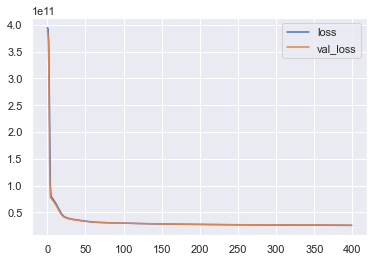

In [282]:
lossdf.plot()

In [283]:
pred = model.predict(X_test)

mean_squared_error(y_test,pred)


25998385189.53602

In [284]:
mean_absolute_error(y_test,pred)

102736.53506844444

In [285]:
explained_variance_score(y_test,pred)
#Increased the Accuracy by 5 percent

0.755882272736145

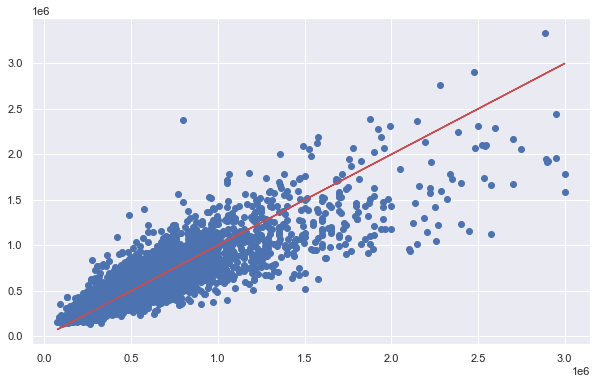

In [290]:
plt.figure(figsize=(10,6))
plt.scatter(x= y_test , y=pred)
plt.plot(y_test,y_test,"r")
#Accuracy is not there and is compormised by outliers So we remove the outliers

# Saving

In [291]:
model.save("House Price Prediction.h5")

In [308]:
#prediction on our custom data
custom  = df.head(1).drop('price',axis=1).values.reshape(-1,20) #-1 keep same rows and align in 20 columns like in dataframe as we have 20 feature values
custom1 = MinMaxScaler()

custom = scaler.transform(custom)

model.predict(custom)

array([[283876.9]], dtype=float32)

In [309]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,montly,yearly,monthly
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,10,2014,10
